In [1]:
import numpy as np

In [2]:
def solve_ilp(inequalities, time_limit=50):
    ids = list(set(np.array(ineqs).flatten().tolist()))
    N = len(ids)
    m = Model("ilp")
    m.setParam(GRB.Param.TimeLimit, time_limit)
    a = {}
    binary = {}
    for i in ids:
        a[i] = m.addVar(vtype=GRB.INTEGER, name="a_{}".format(i))
    m.update()
    objective = 0
    for inequality in inequalities:
        objective = objective + (a[inequality[1]]-a[inequality[0]])

        binary["{}_{}".format(inequality[0], inequality[1])] = m.addVar(vtype=GRB.BINARY, name="b_{}_{}".format(inequality[0], inequality[1]))
        m.update()
        m.addConstr((1-2*binary["{}_{}".format(inequality[0], inequality[1])])*(a[inequality[1]]-a[inequality[0]])>=1)
    m.setObjective(objective, GRB.MAXIMIZE)
    # Set constraints on a[i]>0 and a[i]<=N
    for i in ids:
        m.addConstr(a[i] <= N)
        m.addConstr(a[i] >= 1)
    m.optimize()
    ranks = np.zeros(N)
    for i in ids:
        var_pos = int(m.getVarByName('a_%d' %i).x)-1
        ranks[var_pos] = i 
    return ranks

In [21]:
inequalities = [[1,2], [1,3], [1,4],[3,2],[3,4],[2,4]]
N = 4

In [26]:
np.array(set(np.array(inequalities).flatten()))

array(set([1, 2, 3, 4]), dtype=object)

In [30]:
unique_ids_sorted = np.array(list(set(np.array(inequalities).flatten())))

In [31]:
unique_ids_sorted.sort()

In [32]:
unique_ids_sorted

array([1, 2, 3, 4])

In [33]:
from collections import defaultdict
coeffs = defaultdict(int)
for inequality in inequalities:
    lt = inequality[0]
    gt = inequality[1]
    coeffs[lt]-= 1
    coeffs[gt]+= 1

In [34]:
objective_max = [coeffs[i] for i in unique_ids_sorted] 

In [35]:
objective_max

[-3, 1, -1, 3]

In [4]:
from gurobipy import *

In [5]:
m = Model("ilp")

In [6]:
a = {}
binary = {}

In [7]:
for i in range(1, N+1):
    a[i] = m.addVar(vtype=GRB.INTEGER, name="a_{}".format(i))

In [352]:
m.update()

In [353]:
m.NumBinVars

0

In [354]:
objective = 0
for inequality in inequalities:
    objective = objective + (a[inequality[1]]-a[inequality[0]])
    
    binary["{}_{}".format(inequality[0], inequality[1])] = m.addVar(vtype=GRB.BINARY, name="b_{}_{}".format(inequality[0], inequality[1]))
    m.update()
    m.addConstr((1-2*binary["{}_{}".format(inequality[0], inequality[1])])*(a[inequality[1]]-a[inequality[0]])>=1)

In [355]:
binary

{'1_4': <gurobi.Var b_1_4>,
 '2_1': <gurobi.Var b_2_1>,
 '2_3': <gurobi.Var b_2_3>,
 '2_4': <gurobi.Var b_2_4>,
 '3_1': <gurobi.Var b_3_1>,
 '3_4': <gurobi.Var b_3_4>}

In [356]:
objective

<gurobi.LinExpr: a_1 + -1.0 a_2 + a_1 + -1.0 a_3 + a_4 + -1.0 a_1 + a_3 + -1.0 a_2 + a_4 + -1.0 a_3 + a_4 + -1.0 a_2>

In [357]:
m.setObjective(objective, GRB.MAXIMIZE)

In [358]:
# Set constraints on a[i]>0 and a[i]<=N
for i in range(1, N+1):
    m.addConstr(a[i] <= N)
    m.addConstr(a[i] >= 1)
    
    
    

In [359]:
m.optimize()

Optimize a model with 8 rows, 10 columns and 8 nonzeros
Model has 6 quadratic constraints
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [1e+00, 3e+00]
  Bounds range    [1e+00, 1e+00]
  RHS range       [1e+00, 4e+00]
Presolve removed 8 rows and 0 columns
Presolve time: 0.00s
Presolved: 24 rows, 22 columns, 66 nonzeros
Variable types: 0 continuous, 22 integer (6 binary)
Found heuristic solution: objective 10.0000000

Root relaxation: cutoff, 2 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0        10.00000   10.99999  10.0%     -    0s

Explored 0 nodes (2 simplex iterations) in 0.01 seconds
Thread count was 4 (of 4 available processors)

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+01, best bound 1.000000000000e+01, gap 0.0%


In [360]:
m.getVars()

[<gurobi.Var a_1 (value 3.0)>,
 <gurobi.Var a_2 (value 1.0)>,
 <gurobi.Var a_3 (value 2.0)>,
 <gurobi.Var a_4 (value 4.0)>,
 <gurobi.Var b_2_1 (value -0.0)>,
 <gurobi.Var b_3_1 (value -0.0)>,
 <gurobi.Var b_1_4 (value -0.0)>,
 <gurobi.Var b_2_3 (value -0.0)>,
 <gurobi.Var b_3_4 (value -0.0)>,
 <gurobi.Var b_2_4 (value -0.0)>]

In [361]:
m.getVarByName('a_1').x

3.0

In [362]:
for v in m.getVars():
    print v.varName, v.x

a_1 3.0
a_2 1.0
a_3 2.0
a_4 4.0
b_2_1 -0.0
b_3_1 -0.0
b_1_4 -0.0
b_2_3 -0.0
b_3_4 -0.0
b_2_4 -0.0


In [363]:
ranks = np.zeros(N)

In [364]:
vars = m.getVarByName('a_1')
for i in range(1, N+1):
    var_pos = int(m.getVarByName('a_%d' %i).x)-1
    ranks[var_pos] = i 

In [365]:
ranks

array([ 2.,  3.,  1.,  4.])

In [366]:
import pickle
out_overall  = pickle.load(open('/Users/nipunbatra/Desktop/a.pkl','r'))

In [367]:
test_df = out_overall['Austin']
train_df = out_overall['San Diego']

In [514]:
(len(test_df.index)*12*3)*1./(14042)

1.5023500925794047

In [368]:
i = train_df.tail(4).index.values

In [369]:
from itertools import combinations

In [370]:
for a, b in combinations(i, 2):
    print a,b
    df_a = train_df.ix[a]
    df_b = train_df.ix[b]

9585 9612
9585 9775
9585 9836
9612 9775
9612 9836
9775 9836


In [502]:
start_month, end_month = 1,12
agg_features = np.hstack([['aggregate_'+str(month) for month in range(start_month, end_month+1)],
                         'ratio_min_max','difference_ratio_min_max','p_25','p_50','p_75','skew','kurtosis'])
md_features = ['area','house_num_rooms']
features = {'md_agg':np.hstack([
            agg_features,
            md_features
            ]).tolist()}

In [503]:
f_all = features['md_agg']

In [504]:
len(f_all)

21

In [374]:
# Find not null set of common features
def find_com_features_train(df, home_1, home_2, featureset_max):
    f_1 = df.ix[home_1][featureset_max].dropna()
    
    f_2 = df.ix[home_2][featureset_max].dropna()
    
    com_f =  np.intersect1d(f_1.index, f_2.index)
   
    return com_f

In [375]:
com_features = find_com_features_train(train_df, a, b, f_all)

In [421]:
def find_distance_train_test(df_train, home_1, home_2, df_test, home_test, featureset_train, featureset_max):
    f_test = df_test.ix[home_test][featureset_max].dropna()
    com_f =  np.intersect1d(f_test.index, featureset_train)
    if len(com_f):
        is_common = True
    else:
        is_common = False
        return is_common, None
    
    if len(com_f):
        a = np.linalg.norm(df_train.ix[home_1][com_f]- df_test.ix[home_test][com_f])
        b = np.linalg.norm(df_train.ix[home_2][com_f]- df_test.ix[home_test][com_f])
        if a<=b:
            order = [home_1, home_2]
        else:
            order = [home_2, home_1]
        return is_common, {'order':order,
                    'num_f':len(com_f),
                    'dist_a':a,
                    'dist_b':b,
                          'f':com_f}

In [422]:
find_distance_train_test(train_df, a, b, test_df, 26, com_features, f_all)

(True,
 {'dist_a': 1841.6181005249998,
  'dist_b': 2267.8305305528188,
  'f': array(['aggregate_1', 'aggregate_2', 'aggregate_3', 'aggregate_4',
         'aggregate_5', 'aggregate_6', 'aggregate_7'], dtype=object),
  'num_f': 7,
  'order': [9775, 9836]})

In [378]:
train_df.ix[9775]['hvac_8']

136.31268310546875

In [379]:
test_df.ix[26]['hvac_8']

902.4188232421875

In [380]:
def transform(a):
    return a

In [381]:
train_df.head(2)

,hvac_1,hvac_2,hvac_3,hvac_4,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,...,md_available,full_agg_available,ratio_min_max,difference_ratio_min_max,variance,skew,kurtosis,p_25,p_50,p_75
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,0.002,0.0027,29.05385,19.651184,15.8619,68.252647,145.872055,173.272644,203.351685,72.101601,...,0,1,0.352858,0.352858,11444.769891,0.990983,0.990983,241.198689,268.654037,351.088257


In [382]:
test_df.head(2)

,hvac_1,hvac_2,hvac_3,hvac_4,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,...,md_available,full_agg_available,ratio_min_max,difference_ratio_min_max,variance,skew,kurtosis,p_25,p_50,p_75
22,146.599533,109.834534,69.40638,82.113411,107.155251,135.347214,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.035733,2.928117,13.66290,132.869888,242.395737,543.781433,761.394043,902.418823,610.035828,395.169098,...,1,1,0.289917,0.289917,204787.434396,0.706793,0.706793,704.371658,868.618134,1369.259277


In [383]:
import pandas as pd

In [389]:
overall_df = pd.concat([train_df, test_df])

In [391]:
def scale_0_1(ser, minimum=None, maximum=None):
    if minimum is not None:
        pass
    else:
        minimum = ser.min()
        maximum = ser.max()
    return (ser-minimum).div(maximum-minimum)


In [392]:
def normalise(df):
    new_df = df.copy()
    max_aggregate = df[["aggregate_%d" % i for i in range(1, 13)]].max().max()
    min_aggregate = df[["aggregate_%d" % i for i in range(1, 13)]].min().min()
    new_df[["aggregate_%d" % i for i in range(1, 13)]] = scale_0_1(df[["aggregate_%d" % i for i in range(1, 13)]], min_aggregate, max_aggregate)
    for col in ['area','num_occupants','house_num_rooms','ratio_min_max',
                'skew','kurtosis','variance','difference_ratio_min_max','p_25',
               'p_50','p_75']:
        new_df[col] = scale_0_1(df[col])
    return new_df
    

In [393]:
normalised_df = normalise(overall_df)

In [394]:
train_normalised_df = normalised_df.ix[train_df.index]
test_normalised_df = normalised_df.ix[test_df.index]

In [505]:
from collections import Counter, defaultdict
num_features_all = {}
ineq_dict = {}
#for appliance in ["dw","mw","wm","fridge","hvac"]:
for appliance in ["fridge","hvac"]:
    num_features_all[appliance] = {}
    ineq_dict[appliance] = {}
    for month in range(1, 2):
        num_features_all[appliance][month] = {}
        ineq_dict[appliance][month] = {}
        
        candidate_homes = train_normalised_df['%s_%d' %(appliance, month)].dropna().index.values
        for test_home in test_normalised_df.index[:1]:
            print appliance, month, test_home
            ineqs = []
            
            num_features_all[appliance][month][test_home] = defaultdict(int)
            
            if not np.isnan(test_normalised_df.ix[test_home]['%s_%d' %(appliance, month)]):
                # We need to predict this value!
                # Find candidate set, train homes which have not null for this month
                # Now find features on pairs of homes in candidate homes
                for a,b in combinations(candidate_homes, 2):
                    com_features = find_com_features_train(train_df, a, b, f_all)
                    
                    if len(com_features):
                        # Consider a,b
                        is_common, d = find_distance_train_test(train_normalised_df, a, b, test_normalised_df, test_home, com_features, f_all)
                        if is_common:
                            
                            # Common between train and test. Can add this pair to inequalities
                            ineqs.append(d['order'])
                            
                            num_features_all[appliance][month][test_home][d['num_f']]+= 1
                        
                ineq_dict[appliance][month][test_home] = ineqs 
            else:
                # No need to predict
                pass

                
    

fridge 1 22
hvac 1 22


In [507]:
ineq_dict['hvac'][1][22]

[[203, 1450],
 [203, 1524],
 [1731, 203],
 [2354, 203],
 [203, 2606],
 [203, 3687],
 [203, 3864],
 [203, 3938],
 [203, 4495],
 [203, 4934],
 [203, 5938],
 [6377, 203],
 [203, 6547],
 [203, 7062],
 [7114, 203],
 [203, 8061],
 [203, 8342],
 [8574, 203],
 [203, 8733],
 [203, 9213],
 [9585, 203],
 [203, 9612],
 [9775, 203],
 [9836, 203],
 [1524, 1450],
 [1731, 1450],
 [2354, 1450],
 [2606, 1450],
 [3687, 1450],
 [3864, 1450],
 [3938, 1450],
 [4495, 1450],
 [4934, 1450],
 [5938, 1450],
 [6377, 1450],
 [6547, 1450],
 [7062, 1450],
 [7114, 1450],
 [8061, 1450],
 [8342, 1450],
 [8574, 1450],
 [8733, 1450],
 [9213, 1450],
 [9585, 1450],
 [9612, 1450],
 [9775, 1450],
 [9836, 1450],
 [1731, 1524],
 [2354, 1524],
 [1524, 2606],
 [3687, 1524],
 [1524, 3864],
 [1524, 3938],
 [1524, 4495],
 [1524, 4934],
 [1524, 5938],
 [1524, 6377],
 [6547, 1524],
 [1524, 7062],
 [7114, 1524],
 [1524, 8061],
 [1524, 8342],
 [1524, 8574],
 [1524, 8733],
 [1524, 9213],
 [1524, 9585],
 [1524, 9612],
 [9775, 1524],
 [98

In [460]:
%matplotlib inline
import matplotlib.pyplot as plt

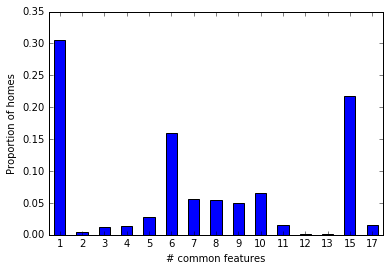

In [462]:
fdf = pd.DataFrame(num_features_all['hvac'][1]).fillna(0).sum(axis=1)
fdf.div(fdf.sum()).plot(kind="bar",rot=0)
plt.xlabel("# common features")
plt.ylabel("Proportion of homes")
plt.savefig('../results/num_features.png')

In [479]:
len(ineqs)

300

In [481]:
m = solve_ilp(ineqs, time_limit=50)
m

Changed value of parameter TimeLimit to 50.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 50 rows, 325 columns and 50 nonzeros
Model has 300 quadratic constraints
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [2e+00, 2e+01]
  Bounds range    [1e+00, 1e+00]
  RHS range       [1e+00, 2e+01]
Presolve removed 50 rows and 0 columns
Presolve time: 0.02s
Presolved: 1200 rows, 925 columns, 3300 nonzeros
Variable types: 0 continuous, 925 integer (300 binary)
Found heuristic solution: objective 2006.0000000

Root relaxation: objective 2.898000e+03, 343 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 2898.00000    0  324 2006.00000 2898.00000  44.5%     -    0s
     0     0 2871.64362    0  333 2006.00000 2871.64362  43.2%     -    0s
     0     0 2871.64362    0  332 2006.00000 2871.64362  43.2%

array([ 8061.,  1524.,  7114.,  8733.,  1731.,  2354.,  3687.,  4934.,
        6377.,  8574.,  2606.,   203.,  7062.,  9775.,  9585.,  5938.,
        1450.,  3864.,  9213.,  6547.,  9836.,  9612.,  8342.,  3938.,
        4495.])

In [482]:
appliance, month

('hvac', 1)

In [497]:
train_df.ix[m[:4]]['hvac_9']

8061    537.882385
1524    325.225800
7114    310.736237
8733    118.302780
Name: hvac_8, dtype: float64

In [498]:
test_df.ix[test_home]['hvac_8']

554.70135498046875

In [434]:
train_normalised_df['area']

54           NaN
203          NaN
527          NaN
1450         NaN
1524         NaN
1731    0.370131
2031         NaN
2354         NaN
2606    0.330839
3687         NaN
3864         NaN
3938         NaN
4083         NaN
4095         NaN
4329         NaN
4495         NaN
4761         NaN
4934         NaN
5009         NaN
5909         NaN
5938    0.351318
6268         NaN
6377         NaN
6429         NaN
6497         NaN
6547         NaN
6689         NaN
7062    0.333220
7114         NaN
7409         NaN
7639         NaN
8061    0.380847
8342    0.333458
8574    0.333220
8733         NaN
8886         NaN
9213         NaN
9370         NaN
9585         NaN
9612         NaN
9775    0.547542
9836         NaN
Name: area, dtype: float64